1.8517857142857121
2.389642857142869
2.4678571428571336


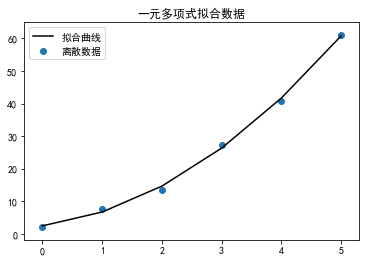

In [8]:
import matplotlib.pyplot as plt
from pylab import mpl
import math
"""一元多项式曲线拟合
  拟合数据为xi=0, 1, 2, 3, 4, 5
对应的函数值yi=2.1, 7.7, 13.6, 27.2, 40.9, 61
"""
x = [0, 1, 2, 3, 4, 5]
y = [2.1, 7.7, 13.6, 27.2, 40.9, 61]
 
"""完成拟合曲线参数计算前相应变量的计算"""
def polynomial_fitting(data_x,data_y):
    size=len(data_x)
    i=0
    sum_x = 0
    sum_sqare_x =0
    sum_third_power_x = 0
    sum_four_power_x = 0
    average_x = 0
    average_y = 0
    sum_y = 0
    sum_xy = 0
    sum_sqare_xy = 0
    while i<size:
        sum_x += data_x[i]
        sum_y += data_y[i]
        sum_sqare_x += math.pow(data_x[i],2)
        sum_third_power_x +=math.pow(data_x[i],3)
        sum_four_power_x +=math.pow(data_x[i],4)
        sum_xy +=data_x[i]*data_y[i]
        sum_sqare_xy +=math.pow(data_x[i],2)*data_y[i]
        i += 1;
    average_x=sum_x/size
    average_y=sum_y/size
    return [[size, sum_x, sum_sqare_x, sum_y]
        , [sum_x, sum_sqare_x, sum_third_power_x, sum_xy]
        , [sum_sqare_x,sum_third_power_x,sum_four_power_x,sum_sqare_xy]]
 
 
"""完成拟合曲线参数的计算
 其中解方程的时候，利用高斯消元法计算相应的参数值
"""
def calculate_parameter(data):
    #i用来控制列元素，line是一行元素,j用来控制循环次数,datas用来存储局部变量。保存修改后的值
    i = 0;
    j = 0;
    line_size = len(data)
 
   #将行列式变换为上三角行列式
    while j < line_size-1:
        line = data[j]
        temp = line[j]
        templete=[]
        for x in line:
            x=x/temp
            templete.append(x)
        data[j]=templete
        #flag标志应该进行消元的行数
        flag = j+1
        while flag < line_size:
            templete1 = []
            temp1=data[flag][j]
            i = 0
            for x1 in data[flag]:
                if x1!=0:
                   x1 = x1-(temp1*templete[i])
                   templete1.append(x1)
                else:
                   templete1.append(0)
                i += 1
            data[flag] = templete1
            flag +=1
        j += 1
 
 
    #求相应的参数值
 
    parameters=[]
    i=line_size-1
    #j标识减去元素个数
    #flag_rol标识除那一列
    flag_j=0
    rol_size=len(data[0])
    flag_rol=rol_size-2
    #获得解的个数
    while i>=0:
        operate_line = data[i]
        if i==line_size-1:
            parameter=operate_line[rol_size-1]/operate_line[flag_rol]
            parameters.append(parameter)
        else:
            flag_j=(rol_size-flag_rol-2)
            temp2=operate_line[rol_size-1]
            #result_flag为访问已求出解的标志
            result_flag=0
            while flag_j>0:
                temp2-=operate_line[flag_rol+flag_j]*parameters[result_flag]
                result_flag+=1
                flag_j-=1
            parameter=temp2/operate_line[flag_rol]
            parameters.append(parameter)
        flag_rol-=1
        i-=1
    return parameters
 
"""计算拟合曲线的值"""
def calculate(data_x,parameters):
    datay=[]
    for x in data_x:
        datay.append(parameters[2]+parameters[1]*x+parameters[0]*x*x)
    return datay
 
 
 
"""完成函数的绘制"""
def draw(data_x,data_y_new,data_y_old):
    plt.plot(data_x,data_y_new,label="拟合曲线",color="black")
    plt.scatter(data_x,data_y_old,label="离散数据")
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.title("一元多项式拟合数据")
    plt.legend(loc="upper left")
    plt.show()
 
data=polynomial_fitting(x,y)
parameters=calculate_parameter(data)
for w in parameters:
    print(w)
newData=calculate(x,parameters)
draw(x,newData,y)